In [1]:
# -*- coding: utf-8 -*-

from bs4 import BeautifulSoup
from datetime import datetime
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Hannanum
import numpy as np
import requests
import pandas as pd
from pandas import DataFrame
import re
from gensim import corpora, models
import gensim

In [2]:
RESULT_PATH = './'
title_text=[]
link_text=[]
contents_text=[]
result={}

In [3]:
def contents_cleansing(contents):
    first_cleansing_contents = re.sub('<dl>.*?</a> </div> </dd> <dd>', '', 
                                      str(contents)).strip()  #앞에 필요없는 부분 제거
    second_cleansing_contents = re.sub('<ul class="relation_lst">.*?</dd>', '', 
                                       first_cleansing_contents).strip()#뒤에 필요없는 부분 제거 (새끼 기사)
    third_cleansing_contents = re.sub('<.+?>', '', second_cleansing_contents).strip()
    contents_text.append(third_cleansing_contents)

In [4]:
def crawler(maxpage,query,sort,s_date,e_date):

    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    page = 1  
    maxpage_t = (int(maxpage)-1)*10+1
    
    while page <= maxpage_t:
        url = "https://search.naver.com/search.naver?where=news&query=" + query + "&sort="+sort+"&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        
        response = requests.get(url)
        html = response.text
 
        soup = BeautifulSoup(html, 'html.parser')
 
        atags = soup.select('._sp_each_title')
        for atag in atags:
            title_text.append(atag.text)     #제목
            link_text.append(atag['href'])   #링크주소        
    
        contents_lists = soup.select('ul.type01 dl')
        for contents_list in contents_lists:
            contents_cleansing(contents_list)
        
        result= {"title":title_text ,"contents": contents_text ,"link":link_text }  
        print(page)
        
        df = pd.DataFrame(result)
        page += 10
        
    outputFileName = '1번데이터.xlsx'
    df.to_excel(RESULT_PATH+outputFileName, sheet_name='sheet1')
             

In [5]:
def main():
    info_main = input("="*50+"\n"+"입력 형식에 맞게 입력해주세요."+"\n"+" 시작하시려면 Enter를 눌러주세요."+"\n"+"="*50)
    
    maxpage = input("최대 크롤링할 페이지 수 입력하시오: ")  
    query = input("검색어 입력: ")  
    sort = input("뉴스 검색 방식 입력(관련도순=0  최신순=1  오래된순=2): ")
    s_date = input("시작날짜 입력(2019.01.04):")
    e_date = input("끝날짜 입력(2019.01.05):")
    
    crawler(maxpage,query,sort,s_date,e_date) 
    
main()

입력 형식에 맞게 입력해주세요.
 시작하시려면 Enter를 눌러주세요.
최대 크롤링할 페이지 수 입력하시오: 101
검색어 입력: 코로나19
뉴스 검색 방식 입력(관련도순=0  최신순=1  오래된순=2): 0
시작날짜 입력(2019.01.04):2020.02.20
끝날짜 입력(2019.01.05):2020.04.23
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571
581
591
601
611
621
631
641
651
661
671
681
691
701
711
721
731
741
751
761
771
781
791
801
811
821
831
841
851
861
871
881
891
901
911
921
931
941
951
961
971
981
991
1001


In [7]:
hannanum = Hannanum()

Data = pd.read_excel(RESULT_PATH+'1번데이터.xlsx')
Data.head()

,Unnamed: 0,title,contents,link
0,0,"""일부 코로나19 환자 혈액 젤리처럼..."" 급사 위험",코로나19가 폐렴 등 호흡기 증상뿐 아니라 환자 혈액 속에 다량의 혈전을 만들어 사...,https://www.ytn.co.kr/_ln/0104_202004232220364552
1,1,질본 “코로나19 2차 유행 가능성 커…항체조사 필요”,방역당국이 23일 코로나19의 2차 유행 가능성이 큰 만큼 대비를 철저히 해야 한다...,http://www.donga.com/news/article/all/20200423...
2,2,'코로나19' 큰 파도 또 올라…대구 집단면역 검토(종합2),코로나19 신규 확진 환자가 6일 연속 20명 이하로 나타나는 등 국내 상황이 소강...,http://www.edaily.co.kr/news/newspath.asp?news...
3,3,코로나19에도 차석용 매직은 계속 된다..LG생건 역대 최대 1분기 실적 기록,LG생활건강이 코로나19 악재에도 불구하고 사상 최대 1·4분기 실적을 기록했다. ...,http://www.fnnews.com/news/202004231359024522
4,4,"KB금융, 장사 잘했지만 '코로나 쇼크'에 아쉬운 1분기(종합)","핵심사업에서는 선전했지만, '코로나19'로 인해 금융시장이 요동치면서 채권과 파생상...",http://www.inews24.com/view/1260235


In [8]:
data = []
for i in Data.contents:
    data.append(i)
data

['코로나19가 폐렴 등 호흡기 증상뿐 아니라 환자 혈액 속에 다량의 혈전을 만들어 사망에 이르게 하는 경우가 여러 건 발견되고 있다고 워싱턴포스트가 보도했습니다. 확진 판정 후 집에 머물던 환자들이 갑자기 숨지는...',
 '방역당국이 23일 코로나19의 2차 유행 가능성이 큰 만큼 대비를 철저히 해야 한다고 강조했다. 권준욱 질병관리본부 중앙방역대책본부 부본부장은 이날 정례브리핑에서 “전 세계적인 유행이 지속되는 한, 또 불가능한...',
 '코로나19 신규 확진 환자가 6일 연속 20명 이하로 나타나는 등 국내 상황이 소강상태를 보이고 있다. 하지만 전문가들은 올가을 겨울 2차 유행 가능성을 언급하고 있다. 세계적인 확산 추세가 여전히 지속하고 있는데다...',
 'LG생활건강이 코로나19 악재에도 불구하고 사상 최대 1·4분기 실적을 기록했다. 면세점이 사실상 개점 휴업상태이고 소비심리도 최악을 치달았지만 럭셔리 화장품 비중이 높은데다 생활용품, 음료 사업의 매출이...',
 "핵심사업에서는 선전했지만, '코로나19'로 인해 금융시장이 요동치면서 채권과 파생상품에서 큰 손실을 입었기 때문이다. KB금융그룹은 23일 올 1분기 당기순이익이 7천295억원으로 전년 동기 대비 13.7%(1천162억원)...",
 '중대본 "미화원·방역업체 관계자도 숨은 영웅" 정부는 신종 코로나바이러스 감염증(코로나19) 환자 진료 및 치료에 힘쓰는 의료인에게 고마움을 전하는 \'덕분에 챌린지\'가 국민의 호응을 얻고 있다고 평가했다....',
 '현대차가 코로나19(COVID-19) 확산에 따른 내수 판매 및 수출 부진 여파로 9년여만에 처음으로 분기판매 100만대를 하회했다. 지난 2011년 3분기 이후 처음이다. 글로벌 판매가 감소한 상황에서도 분기 매출과 영업이익은...',
 '공동선언문 채택…이재갑 장관, 한국 정부 위기극복 노력 소개 주요 20개국(G20) 고용노동 분야 장관들이 23일 신종 코로나바이러스 감염증(코로나19) 사태에 따른 고용 위기에 대응해 취약계

In [9]:
n = []
for i in data :
    v = re.sub('[^\w\s]', '', i)
    n.append(v)
n

['코로나19가 폐렴 등 호흡기 증상뿐 아니라 환자 혈액 속에 다량의 혈전을 만들어 사망에 이르게 하는 경우가 여러 건 발견되고 있다고 워싱턴포스트가 보도했습니다 확진 판정 후 집에 머물던 환자들이 갑자기 숨지는',
 '방역당국이 23일 코로나19의 2차 유행 가능성이 큰 만큼 대비를 철저히 해야 한다고 강조했다 권준욱 질병관리본부 중앙방역대책본부 부본부장은 이날 정례브리핑에서 전 세계적인 유행이 지속되는 한 또 불가능한',
 '코로나19 신규 확진 환자가 6일 연속 20명 이하로 나타나는 등 국내 상황이 소강상태를 보이고 있다 하지만 전문가들은 올가을 겨울 2차 유행 가능성을 언급하고 있다 세계적인 확산 추세가 여전히 지속하고 있는데다',
 'LG생활건강이 코로나19 악재에도 불구하고 사상 최대 14분기 실적을 기록했다 면세점이 사실상 개점 휴업상태이고 소비심리도 최악을 치달았지만 럭셔리 화장품 비중이 높은데다 생활용품 음료 사업의 매출이',
 '핵심사업에서는 선전했지만 코로나19로 인해 금융시장이 요동치면서 채권과 파생상품에서 큰 손실을 입었기 때문이다 KB금융그룹은 23일 올 1분기 당기순이익이 7천295억원으로 전년 동기 대비 1371천162억원',
 '중대본 미화원방역업체 관계자도 숨은 영웅 정부는 신종 코로나바이러스 감염증코로나19 환자 진료 및 치료에 힘쓰는 의료인에게 고마움을 전하는 덕분에 챌린지가 국민의 호응을 얻고 있다고 평가했다',
 '현대차가 코로나19COVID19 확산에 따른 내수 판매 및 수출 부진 여파로 9년여만에 처음으로 분기판매 100만대를 하회했다 지난 2011년 3분기 이후 처음이다 글로벌 판매가 감소한 상황에서도 분기 매출과 영업이익은',
 '공동선언문 채택이재갑 장관 한국 정부 위기극복 노력 소개 주요 20개국G20 고용노동 분야 장관들이 23일 신종 코로나바이러스 감염증코로나19 사태에 따른 고용 위기에 대응해 취약계층 보호에 주력하기로 했다',
 '코로나19 여파로 무급 휴직에 들어간 국내 항공사의 조종사가 자택에서 숨

In [10]:
texts = []
for i in n:
    texts.append(hannanum.nouns(i))
texts

[['코로나19',
  '폐렴',
  '등',
  '호흡기',
  '증상',
  '환자',
  '혈액',
  '속',
  '다량',
  '혈전',
  '사망',
  '경우',
  '거',
  '발견',
  '워싱턴포스트',
  '보도',
  '확진',
  '판정',
  '후',
  '집',
  '환자들'],
 ['방역당국',
  '23일',
  '코로나19',
  '2차',
  '유행',
  '가능성',
  '만큼',
  '대비',
  '강조',
  '권준욱',
  '질병관리본부',
  '중앙방역대책본부',
  '부본부장',
  '이날',
  '정례브리핑',
  '전',
  '세계적',
  '유행',
  '지속',
  '한',
  '불가능한'],
 ['코로나19',
  '신규',
  '확진',
  '환자',
  '6일',
  '연속',
  '20명',
  '이하',
  '등',
  '국내',
  '상황',
  '소강상태',
  '전문가들',
  '올가',
  '겨울',
  '2차',
  '유행',
  '가능성',
  '언급',
  '세계적',
  '확산',
  '추세',
  '지속'],
 ['LG생활건강',
  '코로나19',
  '악재',
  '불구',
  '사상',
  '최대',
  '14분기',
  '실적',
  '기록',
  '면세점',
  '사실상',
  '개점',
  '휴업상태',
  '소비심리',
  '최악',
  '치달았지만',
  '럭셔리',
  '화장품',
  '비중',
  '데',
  '생활용품',
  '음료',
  '사업',
  '매출'],
 ['핵심사업',
  '선전',
  '코로나19',
  '금융시장',
  '요동치',
  '채권',
  '파생상품',
  '손실',
  '때문',
  '금융그룹',
  '23일',
  '1분기',
  '당기순이익',
  '7천295억원',
  '전년',
  '동기',
  '대비',
  '1371천162억원'],
 ['중대본',
  '미화원방역업체',
  '관계자',
  '숨',
  '영웅',
  '정부

In [11]:
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(4838 unique tokens: ['거', '경우', '다량', '등', '발견']...)


In [12]:
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(11, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(3, 1), (11, 1), (17, 1), (18, 1), (22, 1), (23, 1), (31, 1), (32, 1), (37, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(11, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(11, 1), (21, 1), (26, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)], [(18, 1), (92, 1), (93, 1), (94, 1), (95, 1), 

In [13]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


In [14]:
import pyLDAvis.gensim as gensimvis
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary)
ldamodel.print_topics(num_words=10)

[(0,
  '0.028*"코로나19" + 0.018*"신종" + 0.015*"감염증코로나19" + 0.014*"코로나바이러스" + 0.011*"것" + 0.011*"환자" + 0.008*"확진자" + 0.008*"확산" + 0.007*"23일" + 0.007*"등"'),
 (1,
  '0.041*"코로나19" + 0.019*"신종" + 0.018*"감염증코로나19" + 0.018*"코로나바이러스" + 0.016*"23일" + 0.009*"등" + 0.007*"것" + 0.007*"확진자" + 0.007*"미국" + 0.006*"대응"'),
 (2,
  '0.018*"신종" + 0.015*"감염증코로나19" + 0.014*"코로나바이러스" + 0.012*"코로나19" + 0.012*"23일" + 0.005*"확산" + 0.005*"이후" + 0.004*"여파" + 0.004*"기" + 0.004*"글로벌"'),
 (3,
  '0.028*"코로나19" + 0.015*"23일" + 0.014*"신종" + 0.014*"감염증코로나19" + 0.013*"코로나바이러스" + 0.012*"1분기" + 0.008*"경기" + 0.006*"한" + 0.006*"것" + 0.006*"영향"'),
 (4,
  '0.033*"코로나19" + 0.015*"코로나바이러스" + 0.013*"신종" + 0.012*"감염증코로나19" + 0.009*"23일" + 0.008*"국내" + 0.008*"확진자" + 0.007*"등" + 0.006*"이" + 0.006*"확산"')]

In [15]:
NUM_TOPICS = 9
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.048*"코로나19" + 0.018*"23일" + 0.015*"일본" + 0.011*"사망" + 0.009*"등"')
(1, '0.028*"코로나19" + 0.018*"미국" + 0.016*"감염" + 0.014*"감염증코로나19" + 0.014*"신종"')
(2, '0.024*"코로나19" + 0.020*"신종" + 0.019*"감염증코로나19" + 0.017*"코로나바이러스" + 0.014*"대응"')
(3, '0.026*"신종" + 0.025*"확진자" + 0.025*"코로나19" + 0.024*"감염증코로나19" + 0.024*"코로나바이러스"')
(4, '0.028*"코로나19" + 0.020*"코로나바이러스" + 0.019*"23일" + 0.018*"신종" + 0.018*"1분기"')
(5, '0.037*"코로나19" + 0.016*"신종" + 0.016*"감염증코로나19" + 0.014*"코로나바이러스" + 0.011*"미국"')
(6, '0.035*"코로나19" + 0.015*"23일" + 0.013*"중" + 0.011*"의료진" + 0.009*"신종"')
(7, '0.036*"코로나19" + 0.016*"신종" + 0.016*"코로나바이러스" + 0.016*"감염증코로나19" + 0.012*"미국"')
(8, '0.022*"신종" + 0.021*"코로나바이러스" + 0.020*"코로나19" + 0.020*"감염증코로나19" + 0.014*"1분기"')


In [16]:
for idx, topic in ldamodel.show_topics(formatted=False, num_words=10):
    print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))

Topic: 0 
Words: ['코로나19', '23일', '일본', '사망', '등', '오카', '지원', '신종', '이날', '서울']
Topic: 1 
Words: ['코로나19', '미국', '감염', '감염증코로나19', '신종', '것', '코로나바이러스', '확인', '바이러스', '뉴욕주']
Topic: 2 
Words: ['코로나19', '신종', '감염증코로나19', '코로나바이러스', '대응', '것', '등', '23일', '정부', '외교부']
Topic: 3 
Words: ['신종', '확진자', '코로나19', '감염증코로나19', '코로나바이러스', '23일', '수', '국내', '0시', '신규']
Topic: 4 
Words: ['코로나19', '코로나바이러스', '23일', '신종', '1분기', '감염증코로나19', '등', '여파', '올해', '이후']
Topic: 5 
Words: ['코로나19', '신종', '감염증코로나19', '코로나바이러스', '미국', '것', '영향', '1분기', '23일', '대응']
Topic: 6 
Words: ['코로나19', '23일', '중', '의료진', '신종', '감염증코로나19', '이', '마켓', '확산', '코로나바이러스']
Topic: 7 
Words: ['코로나19', '신종', '코로나바이러스', '감염증코로나19', '미국', '유행', '것', '수', '환자', '23일']
Topic: 8 
Words: ['신종', '코로나바이러스', '코로나19', '감염증코로나19', '1분기', '것', '여파', '23일', '정부', '실적']


In [17]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.532794875759231

Coherence Score:  0.377125146329515


In [18]:
import matplotlib.pyplot as plt

perplexity_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

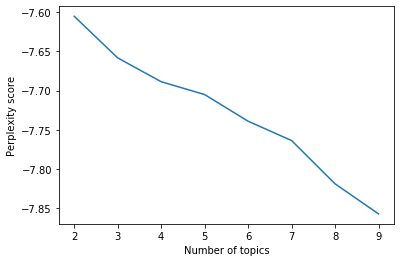

In [19]:
x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [20]:
coherence_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

<function matplotlib.pyplot.show(*args, **kw)>

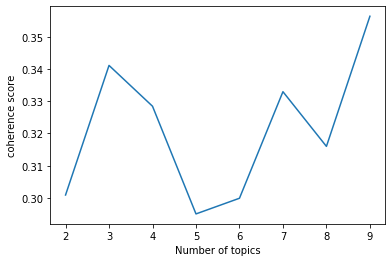

In [21]:
x=range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show

In [22]:
import pyLDAvis.gensim as gensimvis
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=9, id2word = dictionary)
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)

In [23]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.display(prepared_data)       

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

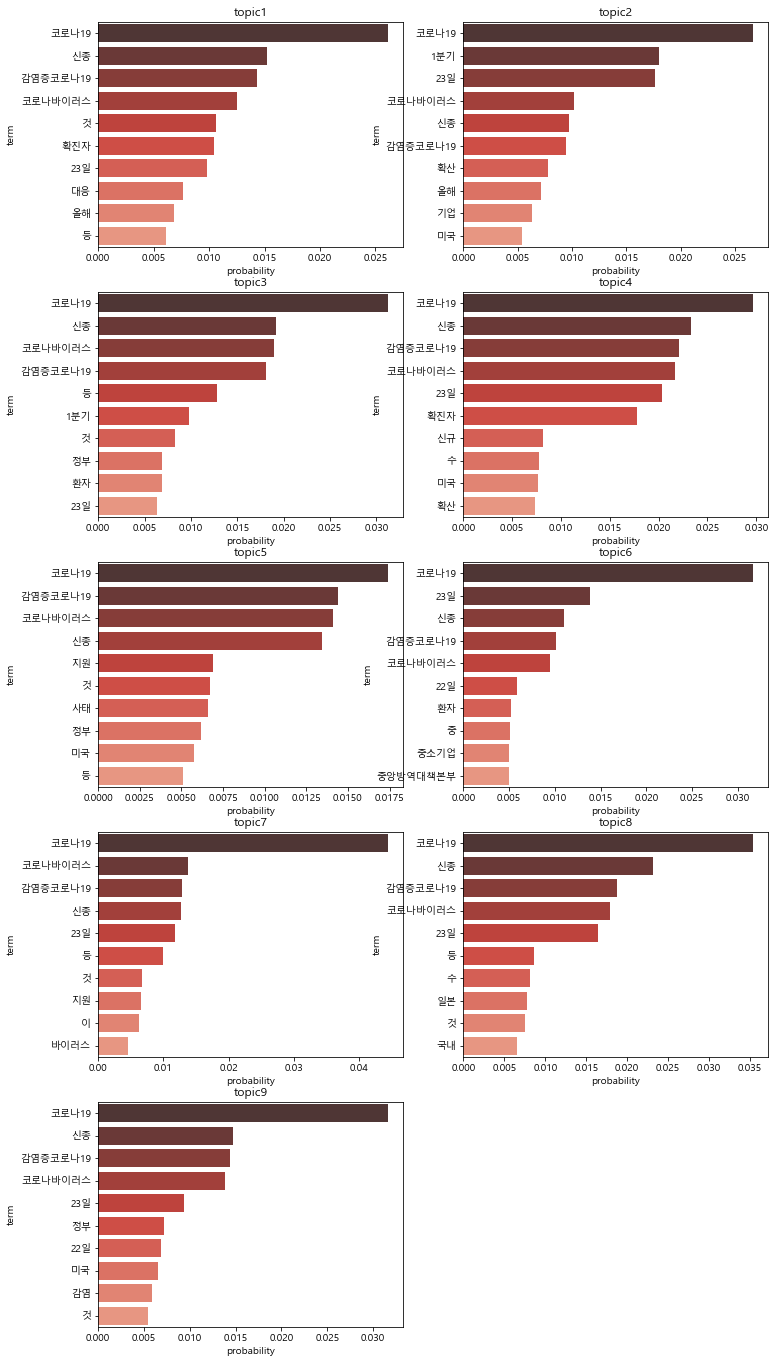

In [25]:
fiz=plt.figure(figsize=(12,24))
for i in range(9):
    df=pd.DataFrame(ldamodel.show_topic(i),columns=['term','prob']).set_index('term')
    
    plt.subplot(5,2,i+1)
    plt.title('topic'+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
plt.show()


In [ ]:
pyLDAvis.show(prepared_data)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [16/May/2020 22:45:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2020 22:45:39] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2020 22:45:40] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2020 22:45:40] "GET /LDAvis.js HTTP/1.1" 200 -
